<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62839 entries, 0 to 62838
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      62839 non-null  object 
 1   type                                    62839 non-null  object 
 2   action                                  62839 non-null  object 
 3   event_time                              62839 non-null  object 
 4   ed_app                                  0 non-null      float64
 5   course_offering_id                      0 non-null      float64
 6   session_id                              62839 non-null  object 
 7   statement_type                          0 non-null      float64
 8   statement_version                       0 non-null      float64
 9   object_id                               62839 non-null  object 
 10  membership_role                         62839 non-null  ob

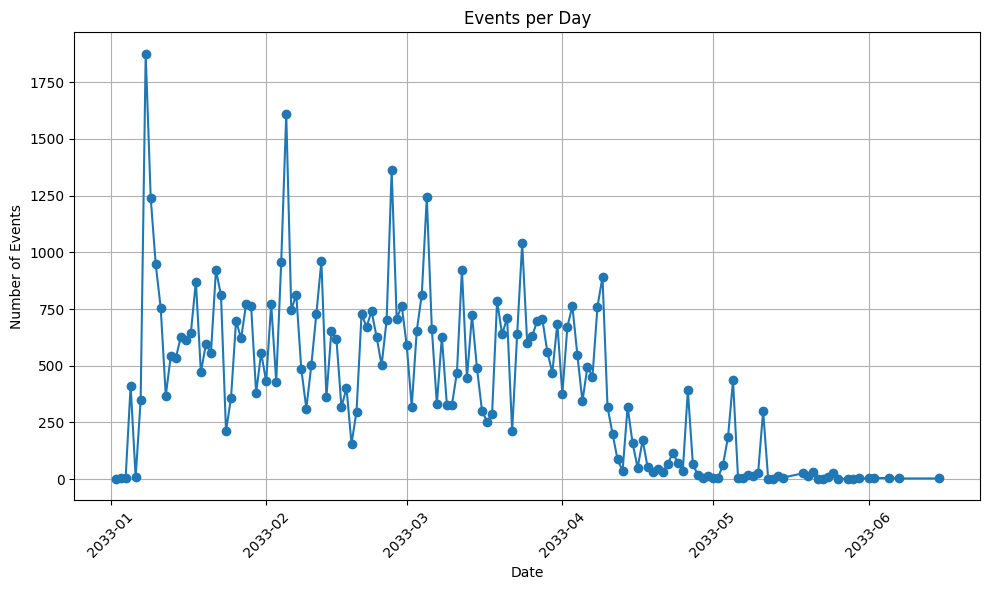

In [116]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
df = pd.read_csv('./data/events.csv', encoding= 'latin')
df0 = pd.read_csv('./data/hackathon_alternate_data/additional/gradebook.csv', encoding= 'latin')
# Display the first few rows of the DataFrame
df.head()

# Get basic information about the DataFrame
df_info = df.info()

# Summary statistics of the data
summary_statistics = df.describe()

# Visualize the data
df['event_time'] = pd.to_datetime(df['event_time'], format=
                                  "mixed")

# Group the events by day and count the number of events per day
daily_events = df['event_time'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_events.index, daily_events.values, marker='o', linestyle='-')
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
 
# Display the graph
plt.tight_layout()
plt.show()

In [58]:
df1 = df.drop(['ed_app', 'course_offering_id', 'statement_type', 
               'statement_version', 'event__object_extensions_asset_subtype',
               'event__object_extensions_entity_id',
               'event__referrer',
               'event__extensions_request_url'], axis= 'columns')
df1

,id,type,action,event_time,session_id,object_id,membership_role,actor_id,event__object_type,event__object_name,event__object_extensions_asset_name,event__object_extensions_asset_type,event__object_extensions_http_method,event__extensions_request_id,event__attachment_type
0,a3bd94baaa440f4793ad08bb64ed3a8f,NavigationEvent,navigatedto,2033-03-27 03:08:48.947000+00:00,f8eac5633f79de90a77b33338b14dd8e,0878d2f171deae54c6a81acc6ffeba20,"[""Learner""]",LEARNER_1,Entity,attachment,file003.pdf,attachment,GET,NaN,pdf
1,0f137ee4ff1b603e3c9de17c5dc9a1d2,NavigationEvent,navigatedto,2033-03-30 16:23:40.909000+00:00,90d33cac1281c636931efa7646e1e1c3,0878d2f171deae54c6a81acc6ffeba20,"[""Learner""]",LEARNER_1,Entity,attachment,file003.pdf,attachment,GET,NaN,pdf
2,86109c5350e06d3d7fe0ec880f37193e,NavigationEvent,navigatedto,2033-03-25 12:57:06.195000+00:00,2c3cdb1505e1c2dbf93d70b499668328,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,NaN,png
3,da5b96f601b39f14e2cc7de59bea35b9,NavigationEvent,navigatedto,2033-03-20 15:57:10.521000+00:00,bd87f5bcffda3d2f6de47cf02697f43b,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,NaN,png
4,7959480d52ab4c94821c122e27a48cd3,NavigationEvent,navigatedto,2033-01-11 18:05:29.939000+00:00,d5c5f36d8bc0ebc001c374f9daec961b,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,NaN,png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62834,e8e75e7c59c54442e61f73ab9c8046fd,NavigationEvent,navigatedto,2033-01-09 05:58:56.060000+00:00,c6707410cd346c60ec7a601d6c74db86,ae93ee47299d919d196a3c558782b4f4,"[""Learner""]",LEARNER_47,Entity,attachment,image002.jpg,attachment,GET,NaN,jpg
62835,070aa75e5032f7623e7dce170c17b5db,NavigationEvent,navigatedto,2033-05-01 08:29:23.934000+00:00,33f425abcca19e71c0c63d44c5b784c8,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_12,Entity,attachment,image004.jpg,attachment,GET,NaN,jpg
62836,3f8130deeba303f5eda546a8a6a42dbf,NavigationEvent,navigatedto,2033-03-30 05:15:38.391000+00:00,cd2ed66a3e610ed8bc73cf2ae7856719,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_13,Entity,attachment,image004.jpg,attachment,GET,NaN,jpg
62837,dc65d663590f1ce9bd07a73fc810798f,NavigationEvent,navigatedto,2033-03-30 05:20:49.120000+00:00,cd2ed66a3e610ed8bc73cf2ae7856719,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_13,Entity,attachment,image004.jpg,attachment,GET,NaN,jpg


In [59]:
df1.event__object_name = df1['event__object_name'].fillna('attachment')
df1.event__attachment_type = df1['event__attachment_type'].fillna('png')


In [60]:
df1.isnull().sum()

id                                          0
type                                        0
action                                      0
event_time                                  0
session_id                                  0
object_id                                   0
membership_role                             0
actor_id                                    0
event__object_type                          0
event__object_name                          0
event__object_extensions_asset_name         0
event__object_extensions_asset_type         0
event__object_extensions_http_method        0
event__extensions_request_id            62839
event__attachment_type                      0
dtype: int64

In [61]:
df1.dtypes

id                                                   object
type                                                 object
action                                               object
event_time                              datetime64[ns, UTC]
session_id                                           object
object_id                                            object
membership_role                                      object
actor_id                                             object
event__object_type                                   object
event__object_name                                   object
event__object_extensions_asset_name                  object
event__object_extensions_asset_type                  object
event__object_extensions_http_method                 object
event__extensions_request_id                        float64
event__attachment_type                               object
dtype: object

In [62]:
df1['event_date'] = pd.to_datetime(df1['event_time']).dt.date
df1['event_time.'] = pd.to_datetime(df1['event_time']).dt.time
df2 = df1.drop('event_time', axis= 'columns')
df2



,id,type,action,session_id,object_id,membership_role,actor_id,event__object_type,event__object_name,event__object_extensions_asset_name,event__object_extensions_asset_type,event__object_extensions_http_method,event__extensions_request_id,event__attachment_type,event_date,event_time.
0,a3bd94baaa440f4793ad08bb64ed3a8f,NavigationEvent,navigatedto,f8eac5633f79de90a77b33338b14dd8e,0878d2f171deae54c6a81acc6ffeba20,"[""Learner""]",LEARNER_1,Entity,attachment,file003.pdf,attachment,GET,NaN,pdf,2033-03-27,03:08:48.947000
1,0f137ee4ff1b603e3c9de17c5dc9a1d2,NavigationEvent,navigatedto,90d33cac1281c636931efa7646e1e1c3,0878d2f171deae54c6a81acc6ffeba20,"[""Learner""]",LEARNER_1,Entity,attachment,file003.pdf,attachment,GET,NaN,pdf,2033-03-30,16:23:40.909000
2,86109c5350e06d3d7fe0ec880f37193e,NavigationEvent,navigatedto,2c3cdb1505e1c2dbf93d70b499668328,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,NaN,png,2033-03-25,12:57:06.195000
3,da5b96f601b39f14e2cc7de59bea35b9,NavigationEvent,navigatedto,bd87f5bcffda3d2f6de47cf02697f43b,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,NaN,png,2033-03-20,15:57:10.521000
4,7959480d52ab4c94821c122e27a48cd3,NavigationEvent,navigatedto,d5c5f36d8bc0ebc001c374f9daec961b,aa6bffb0a91e4f737a943dfddad70a7b,"[""Learner""]",LEARNER_1,Entity,attachment,image006.png,attachment,GET,NaN,png,2033-01-11,18:05:29.939000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62834,e8e75e7c59c54442e61f73ab9c8046fd,NavigationEvent,navigatedto,c6707410cd346c60ec7a601d6c74db86,ae93ee47299d919d196a3c558782b4f4,"[""Learner""]",LEARNER_47,Entity,attachment,image002.jpg,attachment,GET,NaN,jpg,2033-01-09,05:58:56.060000
62835,070aa75e5032f7623e7dce170c17b5db,NavigationEvent,navigatedto,33f425abcca19e71c0c63d44c5b784c8,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_12,Entity,attachment,image004.jpg,attachment,GET,NaN,jpg,2033-05-01,08:29:23.934000
62836,3f8130deeba303f5eda546a8a6a42dbf,NavigationEvent,navigatedto,cd2ed66a3e610ed8bc73cf2ae7856719,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_13,Entity,attachment,image004.jpg,attachment,GET,NaN,jpg,2033-03-30,05:15:38.391000
62837,dc65d663590f1ce9bd07a73fc810798f,NavigationEvent,navigatedto,cd2ed66a3e610ed8bc73cf2ae7856719,071ad0d80cbc232cf74b72681bc77abf,Null,UNKN_13,Entity,attachment,image004.jpg,attachment,GET,NaN,jpg,2033-03-30,05:20:49.120000


In [63]:
df0.dtypes


Student                                                                                            object
Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)                                                    object
Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)                                                    object
Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)                                         object
Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc)                                         object
Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99)                                         object
Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e)                                         object
Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)    object
Assignment 1 Current Score                                                                         object
Assignment 2 Current Score                    

In [64]:
df0 = df0.drop(['Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)',
                'Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)',
                'Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)',
                'Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc)',
                'Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99)', 
                'Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e)'], 
                axis= 'columns')
df0.dtypes

Student                                                                                            object
Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)    object
Assignment 1 Current Score                                                                         object
Assignment 2 Current Score                                                                         object
Assignment 3 Current Score                                                                         object
Participation & engagement Current Score                                                           object
Current Score                                                                                      object
dtype: object

In [88]:
df0 = df0.apply(lambda x: x.fillna(df0.index.value_counts().idxmax()))
    


In [89]:
df0 = df0.apply(lambda x: pd.to_numeric(x, errors= 'coerce'))

df0.dtypes

Student                                                                                            float64
Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)    float64
Assignment 1 Current Score                                                                         float64
Assignment 2 Current Score                                                                         float64
Assignment 3 Current Score                                                                         float64
Participation & engagement Current Score                                                           float64
Current Score                                                                                      float64
Final_Score                                                                                        float64
dtype: object

In [90]:
df0['Final_Score'] = (((df0['Current Score'] / 100) * 90) + df0['Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)'])
                      

In [91]:
df0.head(5)


,Student,Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score,Final_Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,0.0,10.0,0.0,0.0,0.0,0.0,0.0,10.00
2,0.0,10.0,88.0,76.0,75.0,100.0,82.9,84.61
3,0.0,8.5,88.0,72.0,74.0,85.0,78.4,79.06
4,0.0,9.0,90.0,78.0,73.0,90.0,81.3,82.17


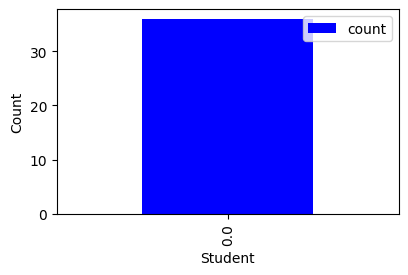

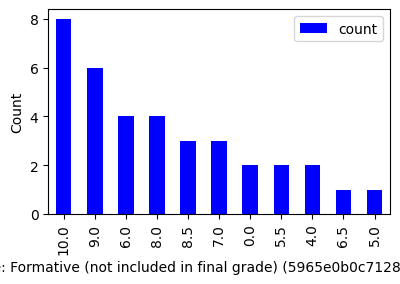

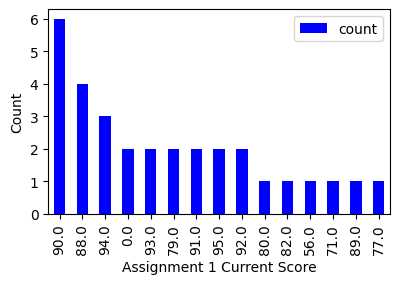

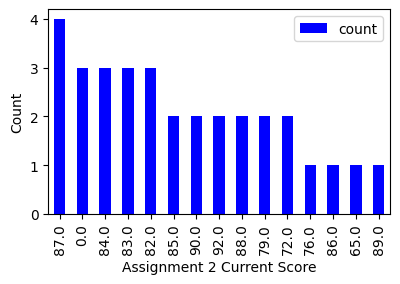

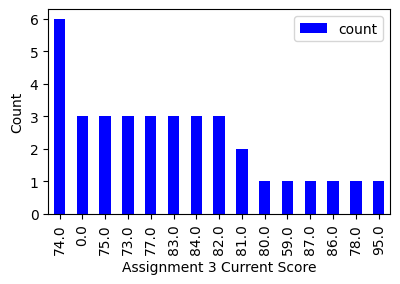

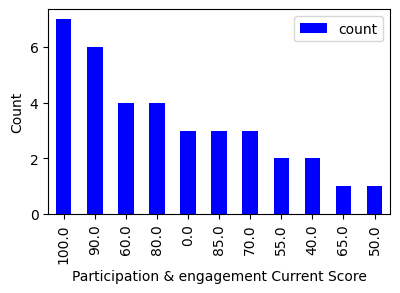

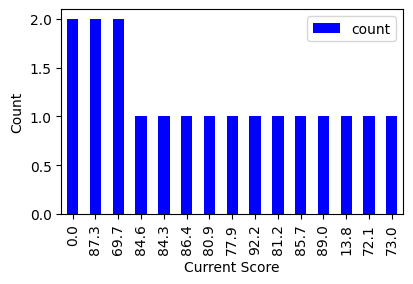

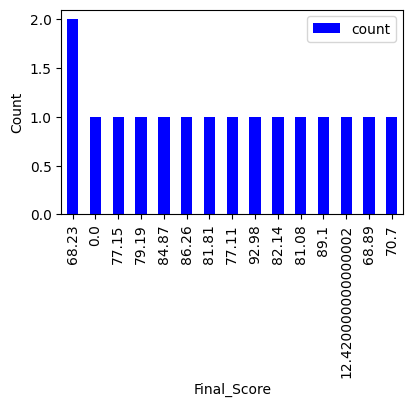

In [106]:
for i in range(len(df0.columns)):
    plt.figure(figsize=(15, 25))
    plt.subplot(8, 3, i+1)
    df0[df0.columns[i]].value_counts().head(15).plot(kind= 'bar', color= 'blue')
    plt.xlabel(df0.columns[i])
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [ ]:
X = df  